In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

coduri_judete = {
    'AB': 'Alba',
    'AR': 'Arad',
    'AG': 'Argeș',
    'BC': 'Bacău',
    'BH': 'Bihor',
    'BN': 'Bistrița-Năsăud',
    'BR': 'Brăila',
    'BT': 'Botoșani',
    'BV': 'Brașov',
    'BZ': 'Buzău',
    'CJ': 'Cluj',
    'CL': 'Călărași',
    'CS': 'Caraș-Severin',
    'CT': 'Constanța',
    'CV': 'Covasna',
    'DB': 'Dâmbovița',
    'DJ': 'Dolj',
    'GJ': 'Gorj',
    'GL': 'Galați',
    'GR': 'Giurgiu',
    'HD': 'Hunedoara',
    'HR': 'Harghita',
    'IF': 'Ilfov',
    'IL': 'Ialomița',
    'IS': 'Iași',
    'MH': 'Mehedinți',
    'MM': 'Maramureș',
    'MS': 'Mureș',
    'NT': 'Neamț',
    'OT': 'Olt',
    'PH': 'Prahova',
    'SM': 'Satu Mare',
    'SB': 'Sibiu',
    'SV': 'Suceava',
    'SJ': 'Sălaj',
    'TL': 'Tulcea',
    'TM': 'Timiș',
    'TR': 'Teleorman',
    'VS': 'Vaslui',
    'VL': 'Vâlcea',
    'VN': 'Vrancea',
    'B': 'București'
}

an = "2019"
search_materie = "INFORMATICA SI TEHNOLOGIA INFORMATIEI"
#search_materie=""
judete = list(coduri_judete.keys())
#judete = list(set(['BZ', 'BR', 'SM']))
stop = False
titularizare = []
note_total = [0] * 11
note_stocare = []


def retrieve_names(url):
    global stop
    response = requests.get(url)

    soup = BeautifulSoup(response.content, 'html.parser')

    rows = soup.find_all('tr', class_=['tr1', 'tr2'])

    if len(rows) == 0:
      stop = True

    for row in rows:
      td_elements = row.find_all('td', class_='td')
      details = [judet] + [element.get_text(strip=True) for element in td_elements]
      if search_materie != "" and details[2]==search_materie:
        if details[4]=="-":
          note_judet[0] +=1
          note_total[0] +=1
        else:
          note_judet[int(details[4].split(".")[0])]+=1
          note_total[int(details[4].split(".")[0])]+=1
      if search_materie == "":
        if(details[4]=="-"):
          note_judet[0] +=1
          note_total[0] +=1
        else:
          note_judet[int(details[4].split(".")[0])]+=1
          note_total[int(details[4].split(".")[0])]+=1
      titularizare.append(details)
      if details[4]!="-":
        details[4] = float(details[4])
      else:
        details[4] = 0.00


for judet in judete:
  note_judet = [0] * 11
  pg = 1
  stop = False
  while stop == False:
    retrieve_names("http://titularizare.edu.ro/"+an+"/generated/files/j/"+judet+"/rd_d_nip_n/page_"+str(pg)+".html")
    pg+=1
  note_stocare.append([judet]+ note_judet + [sum(note_judet)])
  print(judet, "DONE")


#titularizare = sorted(titularizare, key=lambda x: x[1])
if search_materie != "":
  titularizare = [tr for tr in titularizare if tr[2] == search_materie]
titularizare = sorted(titularizare, key=lambda x: x[4], reverse=True)

note_stocare.append(["TOTAL"] + note_total + [sum(note_total)])

df = pd.DataFrame(titularizare, columns=['Județ', 'Număr fişă', 'Disciplina de examen', 'Nume şi prenume', 'Nota la disciplina de examen', 'Lucrare anulată', 'Domiciliu', 'Studii de bază: 1.Nivel(e) studii 2.Profil(e) 3.Specializare(i) 4.Formă învăţământ 5.Tip de învăţământ absolvit 6.Studiile abs. în limba 7.Autorizate', 'Studii de master: 1.Profil(e) 2.Specializare(i) 3.Formă învăţământ 4.Tip de învăţământ absolvit 5.Studiile abs. în limba', '1.Statutul anterior 2.Absolvent 2023/Absolvent DPPD 2023 3.Media absolvire/bacalaureat 4.Media de departajare','1. Probă practică 2. Specialitatea/modulul 1 3. Specialitatea/modulul 2', '1. Probă intensiv/biling 2. Probă orală la lb. de predare 1 3. Probă orală la lb. de predare 2', 'Avize şi atestate: 1. de culte 2. de alternativă 3. al unit. de înv. mil. 4. seminar teologic 5. IGP/ARR 6. ed. specială 7. HIV 8. liceului pedagogic 9. unit. particulare', 'Alte informaţii: 1. Grad didactic 2. Vechime 3. Notă grad 4. Cod post ocupat în et. ant.', 'Titular la: 1.Unităţile de înv. 2.Nivel(e) 3.Disciplina(e)'])

df_note = pd.DataFrame(note_stocare, columns=['Județ', 'Lucrări anulate', '1.00-1.99', '2.00-2.99', '3.00-3.99', '4.00-4.99', '5.00-5.99', '6.00-6.99', '7.00-7.99', '8.00-8.99', '9.00-9.99', '10.00', 'TOTAL'])

if judete == list(coduri_judete.keys()):
  filename = "titularizare_all_"+search_materie.replace(" ","_").replace("/", "_").replace(";", "_").replace(",", "_")+ "_" +an+".xlsx"
  filename_note = "note_titularizare_all_"+search_materie.replace(" ","_").replace("/", "_").replace(";", "_").replace(",", "_")+ "_" +an+".xlsx"
else:
  string =  '_'.join(judete)
  filename = "titularizare_"+string+"_"+search_materie.replace(" ","_").replace("/", "_").replace(";", "_").replace(",", "_")+ "_" + an+".xlsx"
  filename_note = "note_titularizare_"+string+"_"+search_materie.replace(" ","_").replace("/", "_").replace(";", "_").replace(",", "_")+ "_" + an+".xlsx"

df.to_excel(filename, index=False)

print(filename, "saved!")

df_note.to_excel(filename_note, index=False)

print(filename_note, "saved!")

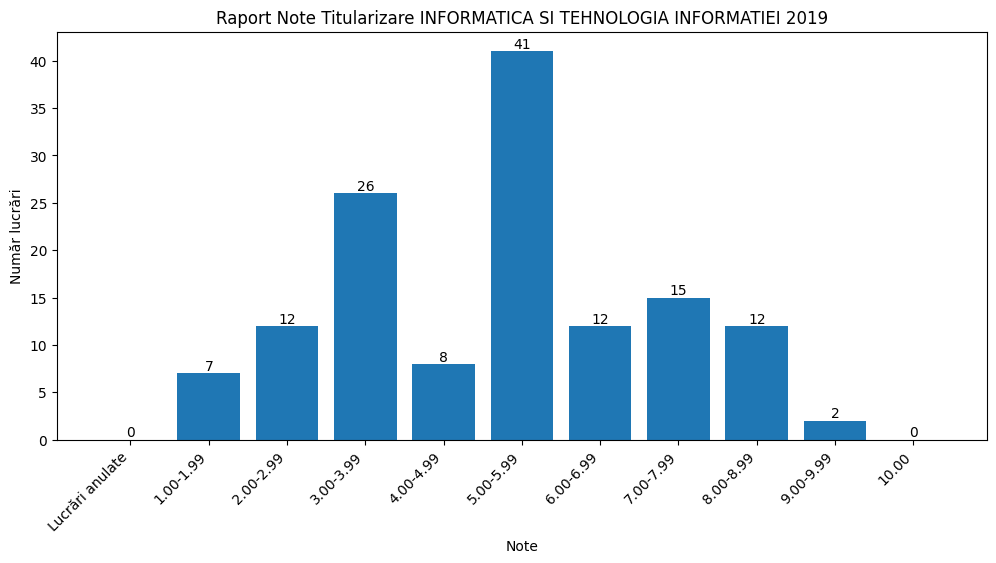

In [ ]:
import matplotlib.pyplot as plt

numbers = note_total

labels = ['Lucrări anulate', '1.00-1.99', '2.00-2.99', '3.00-3.99', '4.00-4.99', '5.00-5.99', '6.00-6.99', '7.00-7.99', '8.00-8.99', '9.00-9.99', '10.00']

plt.figure(figsize=(12, 6))
plt.subplots_adjust(bottom=0.2)

plt.bar(range(len(numbers)), numbers)

plt.xticks(range(len(labels)), labels, rotation=45, ha='right')

plt.xlabel('Note')
plt.ylabel('Număr lucrări')
plt.title('Raport Note Titularizare ' + search_materie + " " + an)

for index, value in enumerate(numbers):
    plt.text(index, value, str(value), ha='center', va='bottom')

if judete == list(coduri_judete.keys()):
    filename_r = "raport_titularizare_all_" + search_materie.replace(" ", "_").replace("/", "_").replace(";", "_").replace(",", "_") + "_" + an + ".png"
else:
    string = '_'.join(judete)
    filename_r = "raport_titularizare_" + string + "_" + search_materie.replace(" ", "_").replace("/", "_").replace(";", "_").replace(",", "_") + "_" + an + ".png"

plt.savefig(filename_r)

plt.show()
